### Chromatograms_Shimadzu

* This method allows for the use of chromatographic data from HPLC-DAD for further mathematics analysis. It creates a matrix with RT(min) and intensity data for a given wavelength.

### Português
Este foi criado para extrair dados de arquivos exportados do HPLC-DAD (Shimadzu) do IPPN-UFRJ. Ele cria uma tabela com eixo RT(min) e os dados de intensidade de um comprimento de onda; este foi excolhido na etapa de extração do instrumento.

A. Início no Instrumento:

1. Selecionar o dado
2. Observar o comprimento de onda usado
3. Observar se há zoom, os tempos de retenção
4. File -> Exportar -> ASCII
5. Selecionar a opção "Chromatogram", apenas esta e desmarcar todas as outras
6. Definir corretamente o caminho onde o novo arquivo será salvo e utilizar o nome da própria amostra para o filename


In [1]:
import os
import os.path
import pandas as pd
import glob
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.graph_objects as go

import data_processing as dp


In [2]:
directory_path = r'C:\Users\borge\Documents\LCDAD\DoE'
os.chdir(directory_path)
%pwd

'C:\\Users\\borge\\Documents\\LCDAD\\DoE'

### Converte os arquivos exportados para arquivos de tabela simples

In [3]:
# Import data
input_folder = directory_path
output_folder = os.path.join(input_folder, 'data')
retention_time_start = 1
retention_time_end = 50

combined_df2 = dp.combine_data2(input_folder, output_folder)
combined_df2

RT(min)   001  002  003  004  005  006  007  008  009  ...  018   019  \
0      0.00000     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0   
1      0.01067     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0   
2      0.02133     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0   
3      0.03200     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0   
4      0.04267     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0   
...        ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
4778  50.96533  1130  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1834   
4779  50.97600  1130  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1833   
4780  50.98667  1128  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1814   
4781  50.99733  1122  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1808   
4782  51.00800  1124  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1802   

      020  021  022  023  024  025  026  027  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  
4778  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4779  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4780  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4781  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4782  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[4783 rows x 28 columns]

In [4]:
%pwd

'C:\\Users\\borge\\Documents\\LCDAD\\DoE'

#### Análise dos dados

In [5]:
# Your existing code to create the Plotly figure
fig = go.Figure()
start_column = 1
end_column = 50

for column in combined_df2.columns[start_column:end_column + 1]:
    fig.add_trace(go.Scatter(x=combined_df2['RT(min)'], y=combined_df2[column], mode='lines', name=column))

fig.update_layout(
    title='Chromatogram Overlapping',
    xaxis_title='RT (min)',
    yaxis_title='Intensity',
    legend_title='Samples',
    hovermode='closest'
)

# Save the figure as an HTML file in the 'images' subdirectory
os.makedirs('images', exist_ok=True)
fig.write_html('images/chromatogram_overlapping.html')

In [6]:
combined_df2

RT(min)   001  002  003  004  005  006  007  008  009  ...  018   019  \
0      0.00000     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0   
1      0.01067     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0   
2      0.02133     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0   
3      0.03200     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0   
4      0.04267     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0   
...        ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
4778  50.96533  1130  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1834   
4779  50.97600  1130  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1833   
4780  50.98667  1128  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1814   
4781  50.99733  1122  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1808   
4782  51.00800  1124  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1802   

      020  021  022  023  024  025  026  027  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  
4778  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4779  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4780  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4781  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4782  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[4783 rows x 28 columns]

In [10]:
import os
import plotly.graph_objects as go

# Your existing code to create the Plotly figure
fig = go.Figure()
start_column = 1
end_column = 27

# Define a larger gap value to separate the traces more clearly
gap = 1000000  # Increased gap value for a more pronounced separation between traces

# Iterate over the specified columns and add each trace with a vertical offset
for i, column in enumerate(combined_df2.columns[start_column:end_column + 1]):
    fig.add_trace(go.Scatter(
        x=combined_df2['RT(min)'],
        y=combined_df2[column] + i * gap,  # Offset each trace by 'i * gap'
        mode='lines',
        name=column
    ))

# Update the layout of the figure
fig.update_layout(
    title='Stacked Chromatograms with Larger Gaps',
    xaxis_title='RT (min)',
    yaxis_title='Intensity (Stacked)',
    legend_title='Samples',
    hovermode='closest',
    width=800,  # Set the desired width of the figure
    height=1000   # Set the desired height of the figure
)

# Show the figure (optional)
fig.show()

# Save the figure as an HTML file in the 'images' subdirectory
os.makedirs('images', exist_ok=True)
fig.write_html('images/stacked_chromatograms_larger_gap.html')



In [ ]:
from scipy.signal import find_peaks
import pandas as pd

peak_int_threshold = 50000

# Initialize a dictionary to store the number of peaks for each sample
peaks_count = {}

# Iterate over each sample column to detect peaks
for column in combined_df2.columns[start_column:end_column + 1]:
    # Extract the intensity values for the current sample
    intensity_values = combined_df2[column].values
    
    # Detect peaks in the intensity values
    peaks, _ = find_peaks(intensity_values, height=peak_int_threshold)  # Adjust the 'height' parameter to refine peak detection
    
    # Count the number of peaks detected
    peaks_count[column] = len(peaks)

# Convert the peaks count dictionary to a DataFrame for better visualization
peaks_count_df = pd.DataFrame(list(peaks_count.items()), columns=['Sample', 'Number of Peaks'])

# Display the DataFrame with peak counts
display(peaks_count_df)  # Use display() in Jupyter Notebook or print(peaks_count_df) in a script

# Optional: Save the DataFrame as a CSV file if needed
peaks_count_df.to_csv('images/peaks_count.csv', index=False)


In [ ]:
from scipy.signal import find_peaks
import plotly.graph_objects as go
import os

# Create a subdirectory to save peak visualization figures
os.makedirs('images/peaks_visualization', exist_ok=True)

# Iterate over each sample column to detect peaks and visualize them
for column in combined_df2.columns[start_column:end_column + 1]:
    # Extract the intensity values and RT values for the current sample
    intensity_values = combined_df2[column].values
    rt_values = combined_df2['RT(min)'].values

    # Detect peaks in the intensity values
    peaks, _ = find_peaks(intensity_values, height=peak_int_threshold)  # Adjust the 'height' parameter if needed
    
    # Create a figure for the sample
    fig = go.Figure()

    # Add the chromatogram trace
    fig.add_trace(go.Scatter(
        x=rt_values,
        y=intensity_values,
        mode='lines',
        name=column,
        line=dict(color='blue')
    ))

    # Add scatter points at the detected peaks
    fig.add_trace(go.Scatter(
        x=rt_values[peaks],
        y=intensity_values[peaks],
        mode='markers',
        name='Detected Peaks',
        marker=dict(color='red', size=8, symbol='circle-open')
    ))

    # Update the layout of the figure
    fig.update_layout(
        title=f'Chromatogram with Detected Peaks for {column}',
        xaxis_title='RT (min)',
        yaxis_title='Intensity',
        legend_title='Legend',
        hovermode='closest'
    )

    # Save the figure as an HTML file in the 'images/peaks_visualization' subdirectory
    fig.write_html(f'images/peaks_visualization/{column}_peaks.html')

    # Optionally, display the figure
    fig.show()


#### "Chromatogram" of fractions

In [ ]:
import plotly.graph_objects as go

# Specify the desired retention time (RT) you want to plot
selected_rt = 26.67  # Replace with the retention time you want to plot

# Find the closest retention time to the selected value
closest_rt = combined_df2['RT(min)'].iloc[(combined_df2['RT(min)'] - selected_rt).abs().argsort()[:1]].values[0]

# Find the row corresponding to the closest retention time
selected_row = combined_df2[combined_df2['RT(min)'] == closest_rt]

# Extract the sample names (columns) and the corresponding intensities from the selected row
sample_names = combined_df2.columns[1:]  # Assuming the first column is 'RT(min)' and others are samples
intensities = selected_row.iloc[0, 1:].values  # Extract values from the selected row, excluding 'RT(min)'

# Create a line plot of intensities across samples
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=sample_names,
    y=intensities,
    mode='lines+markers',
    name=f'RT = {closest_rt} min'
))

# Update the layout of the figure
fig.update_layout(
    title=f'Intensity Across Samples at Closest RT = {closest_rt} min to Selected RT = {selected_rt} min',
    xaxis_title='Samples',
    yaxis_title='Intensity',
    legend_title='Retention Time',
    hovermode='closest'
)

# Create the 'images' directory if it doesn't exist
os.makedirs('images', exist_ok=True)

# Save the figure as an HTML file in the 'images' subdirectory
fig.write_html(f'images/intensity_across_samples_{selected_rt}min.html')

# Show the figure (optional)
fig.show()

### Alignment

In [ ]:
%pwd

#### ESSE ALINHAMENTO ESTA ERRADO  !!!!!

In [ ]:
from data_processing import NMR_alignment  

# Example setup for combined_df2 with RT(min) as the first column
# Assuming combined_df2 is already defined
rt_values = combined_df2['RT(min)'].values  # Extract RT(min) values
samples_data = combined_df2.iloc[:, 1:].values  # Extract sample intensity data

# Define alignment parameters
seg_size = 50  # Segment size for PAFFT
shift = None  # Max shift for PAFFT and RAFFT
lookahead = 1  # Lookahead for RAFFT

# Function to apply alignment to each chromatogram
def align_chromatograms(rt_values, samples_data, method='RAFFT'):
    # Using RT as reference to align chromatograms based on time
    reference = rt_values  # Use RT values as reference (x-axis)
    
    # Align the sample data using the NMR alignment function
    aligned_samples = NMR_alignment(samples_data, reference, method=method, seg_size=seg_size, shift=shift, lookahead=lookahead)
    
    return aligned_samples

# Apply alignment to the chromatograms
aligned_samples = align_chromatograms(rt_values, samples_data, method='PAFFT')  # or method='RAFFT'

# Function to plot chromatogram across samples for a selected RT value
def plot_chromatogram_for_rt(rt_value, rt_values, aligned_samples, sample_names):
    # Find the closest RT index to the selected RT value
    closest_index = (np.abs(rt_values - rt_value)).argmin()
    
    # Extract the aligned intensities at the selected RT value
    intensities_at_rt = aligned_samples[closest_index, :]
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(sample_names, intensities_at_rt, marker='o')
    plt.title(f'Chromatogram Intensities at RT = {rt_value} min')
    plt.xlabel('Samples')
    plt.ylabel('Intensity')
    plt.grid(True)
    plt.show()

# Prompt the user for a specific RT value or use a predefined value
selected_rt_value = float(input("Enter the RT(min) value you want to inspect: "))  # Example: 2.5

# Extract sample names (column headers)
sample_names = combined_df2.columns[1:]

# Plot the chromatogram for the selected RT value
plot_chromatogram_for_rt(selected_rt_value, rt_values, aligned_samples, sample_names)


In [ ]:



# Original data Plot
for column in combined_df2.columns[start_column:end_column + 1]:
    fig.add_trace(go.Scatter(x=combined_df2['RT(min)'], y=combined_df2[column], mode='lines', name=column), row=1, col=1)

# Aligned data plot
for column in aligned_df.columns[start_column:end_column + 1]:
    fig.add_trace(go.Scatter(x=aligned_df['RT(min)'], y=aligned_df[column], mode='lines', name=column), row=2, col=1)

# Update layout with titles and labels
fig.update_layout(height=600, width=800, title_text="Chromatogram Overlapping Original vs Aligned")
fig.update_xaxes(title_text="RT (min)", row=2, col=1)
fig.update_yaxes(title_text="Intensity", row=1, col=1)
fig.update_yaxes(title_text="Intensity", row=2, col=1)

# Show the interactive plot
fig.show()


In [ ]:
error

### Normalization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
plt.figure(figsize=(12, 3))  # Optional: Adjusts the size of the figure
ax = sns.boxplot(data=aligned_df)
ax.set_title('Box Plot of Original Data')  # Set the title of the plot
#ax.set_ylabel('Normalized Value')  # Set the label of the Y-axis
ax.tick_params(axis='x', rotation=90)  # Rotate X-axis labels for better readability

plt.show()  # Display the plot


In [ ]:
normalized_df = dp.z_score_normalize(aligned_df.drop("RT(min)", axis=1).copy())
#normalized_df

import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))

# Box plot
sns.boxplot(data=normalized_df, ax=axes[0])
axes[0].set_title('Box Plot of Normalized Data')
axes[0].set_ylabel('Normalized Value')
axes[0].tick_params(axis='x', rotation=90)

# Histogram
normalized_df.plot(kind='hist', bins=30, alpha=0.5, ax=axes[1])
axes[1].set_title('Histogram of Normalized Data')
#axes[1].set_xlabel('Normalized Value')

#plt.tight_layout()
plt.show()


if not os.path.exists('images'):     # Rename the folder name to your specific case. Keep it organized.
    os.mkdir('images')
fig.savefig("images/Box Plot of Normalized Data.pdf")


### Scaling

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
plt.figure(figsize=(12, 3))  # Optional: Adjusts the size of the figure
ax = sns.boxplot(data=normalized_df)
ax.set_title('Box Plot of Original(Normalized) Data')  # Set the title of the plot
ax.tick_params(axis='x', rotation=90)  # Rotate X-axis labels for better readability

plt.show()  # Display the plot

In [ ]:
scaled_df = dp.min_max_scale(normalized_df.copy(), 0, 1)  # Example range 0 to 1
#normalized_df

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))

# Box plot
sns.boxplot(data=scaled_df, ax=axes[0])
axes[0].set_title('Box Plot of Scaled Data')
axes[0].set_ylabel('Scaled Value')
axes[0].tick_params(axis='x', rotation=90)

# Histogram
scaled_df.plot(kind='hist', bins=30, alpha=0.5, ax=axes[1])
axes[1].set_title('Histogram of Scaled Data')
#axes[1].set_xlabel('Scaled Value')

plt.tight_layout()
plt.show()


if not os.path.exists('images'):     # Rename the folder name to your specific case. Keep it organized.
    os.mkdir('images')
fig.savefig("images/Box Plot of Scaled Data.pdf")


### PCA

In [ ]:
from sklearn.decomposition import PCA

import plotly.express as px

def plot_pca_scores(scores_df, pc_x, pc_y, explained_variance):
    """
    Create an interactive scatter plot for specified PCA components.

    Parameters:
    scores_df (pd.DataFrame): DataFrame containing PCA scores.
    pc_x (int): The principal component number for the x-axis.
    pc_y (int): The principal component number for the y-axis.
    explained_variance (list): List of explained variance ratios for each component.
    """
    # Create the scatter plot
    fig = px.scatter(scores_df, x=f'PC{pc_x}', y=f'PC{pc_y}', text=scores_df.index, title=f'PCA Score Plot: PC{pc_x} vs PC{pc_y}')

    # Update layout with titles and labels
    fig.update_layout(
        xaxis_title=f'PC{pc_x} ({explained_variance[pc_x-1]:.2f}%)',
        yaxis_title=f'PC{pc_y} ({explained_variance[pc_y-1]:.2f}%)'
    )

    # Add hover functionality
    fig.update_traces(marker=dict(size=7),
                      selector=dict(mode='markers+text'))

    # Show the interactive plot
    fig.show()

# Extract the feature columns (excluding the 'RT(min)' column)
X = scaled_df
X = X.T
#X.drop([0,1,2,3,4,5,6,7,8], axis=1, inplace=True)
#X
    
# Set the number of PCA components
n_components = 4  # Change this number as needed

# Perform PCA
pca = PCA(n_components=n_components)
scores = pca.fit_transform(X)

# Create a DataFrame for the scores
column_names = [f'PC{i+1}' for i in range(n_components)]
scores_df = pd.DataFrame(data=scores, columns=column_names)
#zoom
# Calculate the percentage of variance explained by each component
explained_variance = pca.explained_variance_ratio_ * 100  # In percentage

# Plotting: 
plot_pca_scores(scores_df, 
                2, 3,      # Choose the components you want to plot (e.g., PC1 and PC2)
                explained_variance)


if not os.path.exists('images'):     # Rename the folder name to your specific case. Keep it organized.
    os.mkdir('images')
fig.savefig("images/PCA Score Plot.pdf")


In [ ]:
import plotly.graph_objects as go

# Access the loadings from the PCA object
loadings = pca.components_

# Choose which PC to plot
PC_choose = 1 

# Create a Plotly figure
fig = go.Figure()

# Add a line trace for the loadings
fig.add_trace(go.Scatter(x=combined_df2['RT(min)'], y=loadings[PC_choose-1], mode='lines', name=f'PC{PC_choose} Loading'))

# Update layout with titles and labels
fig.update_layout(
    title=f'PC{PC_choose} Loading Plot',
    xaxis_title='RT (min)',
    yaxis_title='Loading Value',
    legend_title='Component'
)

# Show the interactive plot
fig.show()


#### PLS-DA

In [ ]:
# Create the Target Vector for the supervision tool (PLS-DA)
df_metadata = pd.read_csv("Metadata.csv", sep=";")
y = df_metadata['target_column']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cross_decomposition import PLSRegression

# Extract the feature columns (excluding the 'RT(min)' column)
X = scaled_df
X = X.T

# Perform PLS-DA
plsr = PLSRegression(n_components=2)
plsr.fit(X, y)
scores = plsr.transform(X)

# Create a DataFrame for the scores
scores_df = pd.DataFrame(data=scores, columns=['PLS-DA Component 1', 'PLS-DA Component 2'])
scores_df['Group'] = y  # Assuming 'y' contains the group or class information
scores_df['Sample'] = X.T.columns  # Add sample names

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(
    scores_df,
    x='PLS-DA Component 1',
    y='PLS-DA Component 2',
    color='Group',  # Color by group
    hover_data=['Sample'],  # Add sample names to hover data
    text=scores_df.index,  # Add sample names as hover text
    title='PLS-DA Score Plot',
    color_continuous_scale='viridis'  # Use the viridis color scale
)

# Update layout with titles and labels
fig.update_layout(
    xaxis_title='PLS-DA Component 1',
    yaxis_title='PLS-DA Component 2',
    legend_title='Group'
)

# Add hover functionality
fig.update_traces(marker=dict(size=7, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers+text'))

# Show the interactive plot
fig.show()


###### Validation - PLS-DA

In [ ]:
from sklearn.model_selection import cross_val_score, GroupKFold
from sklearn.metrics import r2_score
import warnings

# Disable warnings for the purpose of this demonstration
warnings.filterwarnings("ignore", category=UserWarning)

# Create a GroupKFold object to be used for cross-validation
group_kfold = GroupKFold(n_splits=5)

# Initialize arrays to store Q² and R² scores for each component
num_components = min(X.shape[0], X.shape[1])
q2_scores = np.zeros(num_components)
r2_scores = np.zeros(num_components)

# Perform PLS-DA and evaluate scores for each number of components
for i in range(1, num_components + 1):
    plsr = PLSRegression(n_components=i)
    
    # Cross-validation to get Q² score
    q2_scores[i - 1] = np.mean(cross_val_score(plsr, X, y, cv=group_kfold, groups=X.index))
    
    # Fit the model to get R² score
    plsr.fit(X, y)
    y_pred = plsr.predict(X)
    r2_scores[i - 1] = r2_score(y, y_pred)

# Plot Q² scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_components + 1), q2_scores, marker='o', label='Q² Scores')
plt.xlabel('Number of Components')
plt.ylabel('Q² Score')
plt.title('Q² Scores for PLS-DA')
plt.legend()
plt.show()

# Plot R² scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_components + 1), r2_scores, marker='o', label='R² Scores')
plt.xlabel('Number of Components')
plt.ylabel('R² Score')
plt.title('R² Scores for PLS-DA')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

# Cross-validation to get predicted y values
y_pred = cross_val_predict(plsr, X, y, cv=5)  # You can adjust the number of folds (cv) as needed

# Calculate Q² score
q2 = plsr.score(X, y)
print(f'Q² Score: {q2:.2f}')

# Calculate R2 score
r2 = r2_score(y, y_pred)
print(f'R2 Score: {r2:.2f}')

print(f"Q2/R2: {q2/r2:.2f}.")

In [ ]:
import plotly.graph_objects as go

# Access the loadings from the PLSR object
loadings = plsr.x_loadings_

# Create a Plotly figure for PLS-DA Component 1 Loadings
fig1 = go.Figure()

# Add a line trace for the loadings of Component 1
fig1.add_trace(go.Scatter(x=combined_df2['RT(min)'], y=loadings[:, 0], mode='lines', name='PLS-DA Component 1 Loading'))

# Update layout with titles and labels for Component 1
fig1.update_layout(
    title='PLS-DA Component 1 Loading Plot',
    xaxis_title='RT (min)',
    yaxis_title='Loading Value'
)

# Show the interactive plot for Component 1
fig1.show()

# Create a Plotly figure for PLS-DA Component 2 Loadings
fig2 = go.Figure()

# Add a line trace for the loadings of Component 2
fig2.add_trace(go.Scatter(x=combined_df2['RT(min)'], y=loadings[:, 1], mode='lines', name='PLS-DA Component 2 Loading'))

# Update layout with titles and labels for Component 2
fig2.update_layout(
    title='PLS-DA Component 2 Loading Plot',
    xaxis_title='RT (min)',
    yaxis_title='Loading Value'
)

# Show the interactive plot for Component 2
fig2.show()


In [ ]:
# Calculate the VIP scores from the fitted PLS model
def calculate_vip_scores(pls_model, X):
    t = pls_model.x_scores_  # Scores
    w = pls_model.x_weights_  # Weights
    q = pls_model.y_loadings_  # Loadings
    p, h = w.shape
    vip = np.zeros((p,))
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)

    for i in range(p):
        weight = np.array([(w[i, j] / np.linalg.norm(w[:, j]))**2 for j in range(h)])
        vip[i] = np.sqrt(p * (s.T @ weight) / total_s)

    return vip

# Assuming 'pls' is your fitted PLSRegression model
vip_scores = calculate_vip_scores(plsr, X)

# Create a DataFrame for VIP scores
vip_df = pd.DataFrame({'Variable': X.columns, 'VIP Score': vip_scores})

# Sort DataFrame by VIP Score in descending order
vip_df = vip_df.sort_values(by='VIP Score', ascending=False).head(10)

# Print or visualize VIP scores
vip_df


In [ ]:
import plotly.express as px

# Create an interactive bar plot using Plotly Express
fig = px.bar(vip_df, 
             x='VIP Score', 
             y='Variable', 
             orientation='h',  # Horizontal bar plot
             title='VIP Scores of Variables in PLS Model')

# Update layout
fig.update_layout(
    xaxis_title='VIP Score',
    yaxis_title='Variable'
)

# Show the interactive plot
fig.show()

---

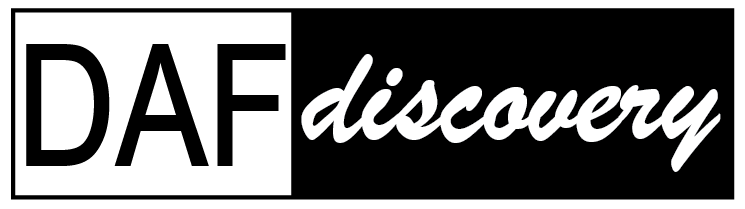

In [ ]:
# Create the Target Vector for the supervision tool (PLS-DA)
Metadata = pd.read_csv("Metadata_analitica.csv", sep=";")
Metadata.columns

if ('HPLC_filename') in Metadata.columns and ('BioAct_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist()
    Ordered_HPLC_DAD_filename = Metadata['HPLC_filename'].values.tolist()
    Ordered_BioAct_filename = Metadata['BioAct_filename'].values.tolist()
    print('You are about to merge data from: HPLC-DAD + BioAct. Go for Option 3')
    data_inuse = ['HPLC-DAD', 'BioAct']


elif ('HPLC_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist()
    Ordered_HPLC_DAD_filename = Metadata['HPLC_filename'].values.tolist()    
    print('You are about to work with HPLC-DAD data alone. Have a look in what more you could do with additional data. . Go for Option 5')
    data_inuse = ['HPLC-DAD']
    
else: print('Error (sorry!), please check your Metadata')

print(f'Data in Use: {data_inuse}')

In [ ]:
if data_inuse == ['HPLC-DAD']:
    # NMR
    HPLC_DAD = pd.read_csv('data\combined_data.csv', sep=';',header=0)   # assuming the NMR data was exported and saved as NMR.csv
    HPLC_DADdata = HPLC_DAD.drop(["RT(min)"], axis=1)
    axis = HPLC_DAD["RT(min)"]
    
else: print('Try the next one')

# REORDERING data according to the Metadata (Ordered_Samples)

HPLC_DAD = HPLC_DAD[Ordered_HPLC_DAD_filename] # reorder columns according to the sampleIDs
HPLC_DAD.rename(columns={i:j for i,j in zip(Ordered_HPLC_DAD_filename,Ordered_Samples)}, inplace=True) # rename column headers as sampleIDs

print('Data is reordered according to the Matadata.')

In [ ]:
# Chose driver to produce highlighted NMR spectra showing highly correlated peaks

%matplotlib notebook

# DRIVER FROM THE HPLC_DAD data
driver = 21.0

corr, covar = dp.STOCSY_LCDAD(driver, HPLC_DADdata, axis)
plt.show()
